<a href="https://colab.research.google.com/github/ritikakhandelwal-17/Fuel-Cell-EV-Voltage-Prediction/blob/main/Hardware_Data_BTP_FCEV_Voltage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np


from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


In [2]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.3 MB/s 
     |████████████████████████████████| 1.6 MB 55.1 MB/s 


In [3]:
data = pd.read_csv('/content/btp hardware data - Sheet1.csv')


In [4]:
data

,Current,Voltage
0,4.0,37.53
1,5.0,37.30
2,7.0,37.00
3,8.0,36.40
4,9.0,36.20
5,9.5,35.70
6,11.0,35.10
7,11.0,34.70
8,12.0,34.40
9,12.1,34.20


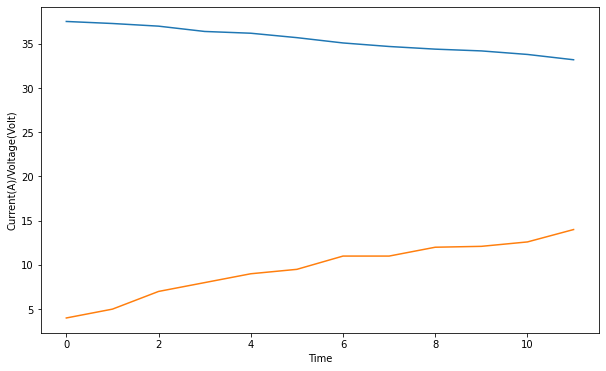

In [5]:
plt.figure(figsize=(10,6))
plt.plot(data['Voltage'], label='Voltage')
plt.plot(data['Current '], label='Current')
plt.xlabel('Time')
plt.ylabel('Current(A)/Voltage(Volt)')
plt.show()

In [6]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [7]:

X = data.drop("Voltage",axis=1)
y=data['Voltage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
models = []
models_mae = []
models_mse = []
models_rmse = []
models_r_squared = []

In [9]:
#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
models.append('Linear Regression')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)

MAE: 0.40004329004329264
MSE: 0.2082929695845297
RMSE: 0.4563912461742991
R2 Score: 0.925496716202308


In [10]:
#SVM
svr = SVR(C=10)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

models.append('SVR')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)

MAE: 0.2895339247935714
MSE: 0.18335093717155404
RMSE: 0.42819497564959125
R2 Score: 0.9344181086192568


In [11]:
#Random Forest
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

models.append('Random Forest')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)

MAE: 0.38244444444445236
MSE: 0.14727837037037447
RMSE: 0.38376864172359687
R2 Score: 0.9473207269220258


In [12]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

models.append('XGBRegressor')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)

[19:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.3725233968098962
MSE: 0.1666670453937579
RMSE: 0.40824875430766216
R2 Score: 0.9403856874888196


In [13]:
import keras_tuner
from tensorflow import keras

def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [25,50,100,150,200,250,300]),
      activation='relu'))
  model.add(keras.layers.Dense(
      hp.Choice('units', [25,50,100,150,200,250,300]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='linear'))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10)

tuner.search(X_train, y_train, epochs=500, validation_split=0.2)
best_model = tuner.get_best_models()[0]

predictions = best_model.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

models.append('ANN')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)



Trial 6 Complete [00h 00m 27s]
val_loss: 0.9003523588180542

Best val_loss So Far: 0.31357741355895996
Total elapsed time: 00h 03m 09s
1/1 [==============================] - 0s 146ms/step
MAE: 1.17824213663737
MSE: 1.4652425619427358
RMSE: 1.2104720409587062
R2 Score: 0.4759046229806846


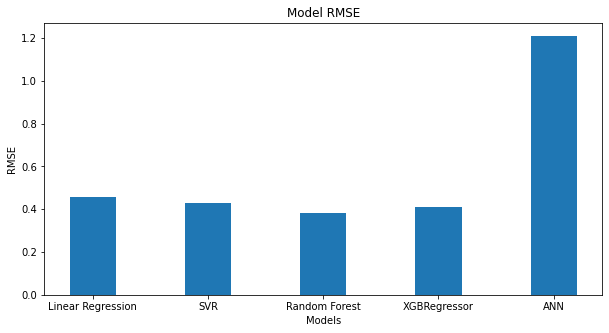

In [18]:
 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, models_rmse,
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("Model RMSE")
plt.show()

In [15]:
for i in range (0, 5):
  print('The RMSE for '+models[i]+' is '+ str(models_rmse[i]))
  print('\n')

The RMSE for Linear Regression is 0.4563912461742991


The RMSE for SVR is 0.42819497564959125


The RMSE for Random Forest is 0.38376864172359687


The RMSE for XGBRegressor is 0.40824875430766216


The RMSE for ANN is 1.2104720409587062




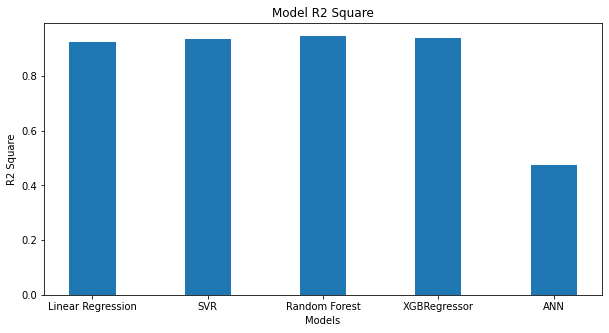

In [19]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, models_r_squared,
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("R2 Square")
plt.title("Model R2 Square")
plt.show()

In [17]:
for i in range (0, 5):
  print('The R-Squared Score for '+models[i]+' is '+ str(models_r_squared[i]))
  print('\n')


The R-Squared Score for Linear Regression is 0.925496716202308


The R-Squared Score for SVR is 0.9344181086192568


The R-Squared Score for Random Forest is 0.9473207269220258


The R-Squared Score for XGBRegressor is 0.9403856874888196


The R-Squared Score for ANN is 0.4759046229806846


